# Time-Series Project - VP of Marketing

Name: Craig C. and Jerry N.

<h2>Goals</h2>

- Determine the best way to launch a new marketing campaign in the near future.

- Determine the target of the campaign.

- Back reccomendations of target with statistics and visualizations.

<h2>Executive Summary</h2>

- The central region of the US has the least amount of proft consiting of less than 2% of total proft.

- Within the central region Texas has the least amount of proft and in some cases we are losing profit.

- Looking at Texas, San Antonio and Houston are the largest contributors to the loss of profit. 

- The loss of profit is due to the amount of discount being applied to the products.


<h2>Imports</h2>

In [1]:
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('figure', figsize=(10, 7))
plt.style.use('fivethirtyeight')

<h2>Data Acquisition/Wrangle</h2>

In [3]:
df = wrangle.get_superstore_data()

Let me get that for you...


Take Away:
- The data is in a csv file.

Query:
- Joined five tables to create the dataframe.
- The tables cosist of orders, categories, products, customers, and regions.

In [4]:
df = wrangle.prep_superstore_data(df)

Take Aways:
- Dropped unnecessary columns. (ID columns, Unnecessary columns, and redundant columns)
- Converted the date columns to a manipulatable format(datetime) and set as the index.
- Feature engineered three new columns (average item sale and orginal sale)

In [5]:
df.head()

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,130.9800,261.9600,0.000000
2016-11-08,CA-2016-152156,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,243.9800,731.9400,0.000000
2015-10-11,US-2015-108966,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South,191.5155,958.0275,0.046972
2015-10-11,US-2015-108966,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South,11.1840,22.5680,0.886211
2017-04-15,CA-2017-114412,2017-04-20,Standard Class,Consumer,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South,5.1840,15.7520,1.269680


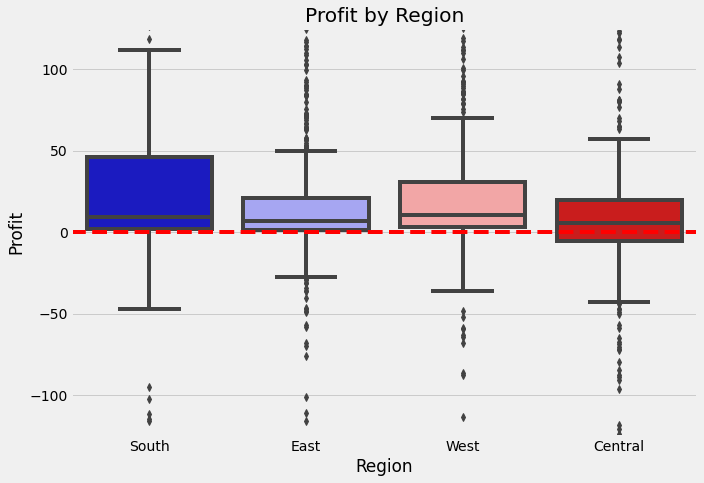

In [6]:
# Explore
# Plot profit by region
df1 = df.sort_values('profit', ascending=False)
sns.boxplot(x='region_name', y='profit', data=df1, palette='seismic')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Profit by Region')
plt.ylim(-125, 125)
plt.axhline(y=0, linestyle='--', color='red')
plt.show()

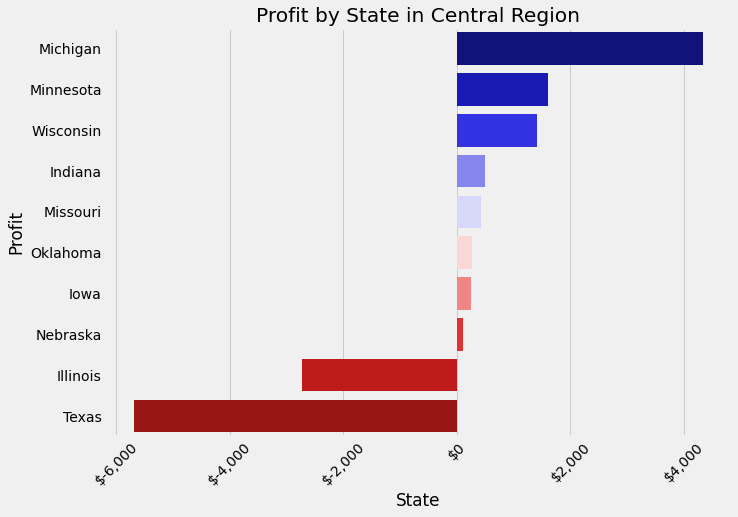

In [7]:
central_region = df.loc[df['region_name'] == 'Central']
central_states = central_region.groupby('state').sum()['profit'].sort_values(ascending=False)
ax = sns.barplot(central_states, central_states.index, palette='seismic')
ax.set_xticklabels([f'${x:,.0f}' for x in ax.get_xticks()])
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profit by State in Central Region')
plt.show()

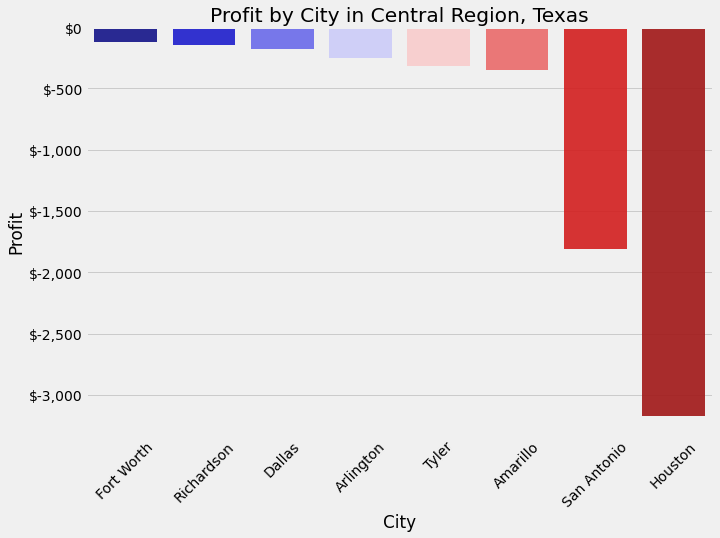

In [8]:
texas_cities = central_region.loc[central_region['state'] == 'Texas']
texas_cities = texas_cities.loc[texas_cities['profit'] < -100]
texas_profit = texas_cities.groupby('city').sum()['profit'].sort_values(ascending=False)
texas_profit.sort_values(ascending=False).head()
ax = sns.barplot(x=texas_profit.index, y=texas_profit, alpha=0.9, palette='seismic')
ax.set_yticklabels([f'${x:,.0f}' for x in ax.get_yticks()])
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Profit')
plt.title('Profit by City in Central Region, Texas')
plt.show()

Take Away:

- Identified the central region of the US has the least amount of proft consiting of less than 2% of total proft.
